# Label Entropy

$$
H(X) = -\sum_{i=1}^{n} p_i \log_2(p_i) 
$$
$$
H(X,Y) = -\sum_{x \in X}\sum_{y \in Y} P(x,y) \log_2P(x,y) = I(X;Y)
$$
$$
I(C;X) = -\sum_{c \in C}\sum_{x \in X}P(c, x)log_2\frac{P(c,x)}{P(c)p(x)}
$$

In [232]:
# dimensions of labels are features are random variables X: {X_1, X_2, X_3}
# category of feature is 

### Imports and loads

In [233]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [234]:
high_dim_label_path = "../data/labels/high_dim/cifar10_speech.npy"

## Entropy of Classes

In [235]:
n_classes = 10

In [236]:
p = 1/n_classes
h_y = -sum([(p)*np.log2(p) for i in range(n_classes)])
h_y

3.321928094887362

## Entropy of Labels

### One-Hot

In [237]:
classes = np.arange(0,n_classes)
labels = np.zeros([n_classes,n_classes])
labels[classes, classes] = 1

In [238]:
# All Labels

In [239]:
# assumes equal class distribution
prob_one = np.sum(labels, axis=0)/n_classes
prob_zero = np.sum(np.ones([n_classes, n_classes]) - labels, axis=0)/n_classes

In [240]:
probs = np.stack([prob_one, prob_zero])
h_x = -np.sum(probs * np.log2(probs), axis=0)

In [241]:
print(h_x)

[0.46899559 0.46899559 0.46899559 0.46899559 0.46899559 0.46899559
 0.46899559 0.46899559 0.46899559 0.46899559]


### High Dimensional 

In [242]:
high_dim_labels = np.load(high_dim_label_path).reshape(10, -1) # original labels are 64x64 w/ 10 classes, reshape to flat vectors 

In [243]:
min_val = np.min(high_dim_labels)
max_val = np.max(high_dim_labels)
num_bins = math.ceil(2 * 10 ** 1/3)
bins = np.linspace(min_val, max_val, num_bins)

In [244]:
bins

array([-8.00000000e+01, -6.66667416e+01, -5.33334832e+01, -4.00002247e+01,
       -2.66669663e+01, -1.33337079e+01, -4.49478626e-04])

In [245]:
high_dim_labels

array([[-63.055466, -54.124146, -43.19886 , ..., -80.      , -80.      ,
        -80.      ],
       [-54.61876 , -51.501842, -44.887394, ..., -80.      , -80.      ,
        -80.      ],
       [-57.567795, -52.088005, -42.65007 , ..., -80.      , -80.      ,
        -80.      ],
       ...,
       [-75.41502 , -71.7176  , -67.47974 , ..., -80.      , -80.      ,
        -80.      ],
       [-79.84568 , -79.30102 , -77.15511 , ..., -80.      , -80.      ,
        -80.      ],
       [-72.990265, -70.64993 , -67.11142 , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [246]:
binned_labels = np.digitize(high_dim_labels, bins, right=True)
print(np.min(binned_labels))
print(np.max(binned_labels))

0
6


In [263]:
def create_bins(arr, n_bins):
    eps = 0.01
    bins = np.linspace(np.min(arr), np.max(arr), n_bins+1)
    bins[-1] += eps # ensures max value is included in final bin, np digitize uses half open bins
    return bins

def calc_probs(arr, n_classes):
    probs = np.zeros(n_classes)
    for _, val in enumerate(arr):
        probs[val] +=1 
    probs = probs / len(arr)
    return probs

def bin_high_dim_labels(labels, n_bins):
    binned_values = np.zeros([labels.shape[0], labels.shape[1]])
    probs = np.zeros([n_bins, labels.shape[1]])

    for i, col in enumerate(high_dim_labels.T):
        col_bins = create_bins(col, n_bins)
        binned_column = np.digitize(col, col_bins) - 1
        binned_values[:,i] = binned_column.T
        probs[:, i] =  calc_probs(binned_column, n_bins).T
        
    return binned_values, probs

In [264]:
binned_labels, probs = bin_high_dim_labels(high_dim_labels, 5)
probs

array([[0.4, 0.2, 0.2, ..., 0. , 0. , 0. ],
       [0.2, 0.3, 0.4, ..., 0. , 0. , 0. ],
       [0.1, 0.2, 0.1, ..., 0. , 0. , 0. ],
       [0.1, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.2, 0.3, 0.3, ..., 1. , 1. , 1. ]])

In [265]:
h_high_dim = - np.sum(probs * 
                    np.log2(probs, out=np.zeros_like(probs), where=(probs!=0))
                   ,axis=0)

(array([ 162.,    0.,   43.,   51.,   39.,  130.,  208.,  915.,  896.,
        1652.]),
 array([0.        , 0.23219281, 0.46438562, 0.69657843, 0.92877124,
        1.16096405, 1.39315686, 1.62534967, 1.85754248, 2.08973529,
        2.32192809]),
 <BarContainer object of 10 artists>)

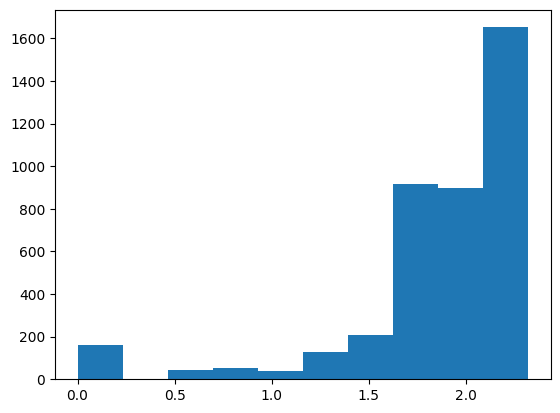

In [266]:
plt.hist(h_high_dim)

In [203]:
probs.shape

(5, 4096)

## Relevance: I(C;X) and I(C;X)

In [ ]:
#want to look at: how muchh info is gained per square

### One Hot Encoding

4.308869380063768